# The Bellman Equation in Dynamic Programming
Generated by Anthropic's AI Claude

## Overview

The Bellman equation is a cornerstone of dynamic programming and optimal control theory. Named after Richard Bellman, this equation provides a mathematical framework for solving complex decision-making problems by breaking them down into simpler subproblems. It is particularly useful in scenarios where decisions must be made sequentially over time, and each decision affects both immediate rewards and future possibilities.

## Key Concepts

1. **Recursive Nature**: The Bellman equation is inherently recursive, relating the value of a current state to the optimal future value.
2. **Optimal Substructure**: It exploits the principle that an optimal solution contains optimal solutions to its subproblems.
3. **Value Function**: Represents the maximum expected return starting from a given state.
4. **Policy**: A strategy that specifies what action to take in each state.
5. **Infinite Horizon**: Extends the problem to an indefinite time frame, often using discounting.
6. **Principle of Optimality**: An optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision.

## Glossary of Terms and Math Symbols

| Symbol | Meaning |
|--------|---------|
| x | State variable |
| a or u | Action or control variable |
| V(x) or J(x) | Value function |
| T(x,a) or g(x,u) | Transition function |
| F(x,a) or f(x,u) | Reward function |
| β | Discount factor |
| max | Maximization operator |
| Σ | Summation operator |
| ∈ | "Element of" symbol |
| U ⊂ ℝ | Action space, a subset of real numbers |

These components come together in the Bellman equation:

V(x) = max[F(x,a) + βV(T(x,a))]

For infinite horizon problems:

V(x) = max Σ[β^k * F(x_{t+k}, a_{t+k})]

This script does the following:

* Defines a 5x5 grid world with a goal state, obstacle states, and rewards.
* Implements the value iteration algorithm to solve the Bellman equation.
* Visualizes the final value function using a color-coded grid.

The resulting graph shows:

* The value of each state (cell) in the grid world.
* The goal state is highlighted in yellow.
* Obstacle states are highlighted in red.
* The color intensity represents the value of each state.

This example demonstrates how the Bellman equation works in a discrete environment, showing how the value of each state is computed based on the immediate reward and the discounted future value of the best next state.

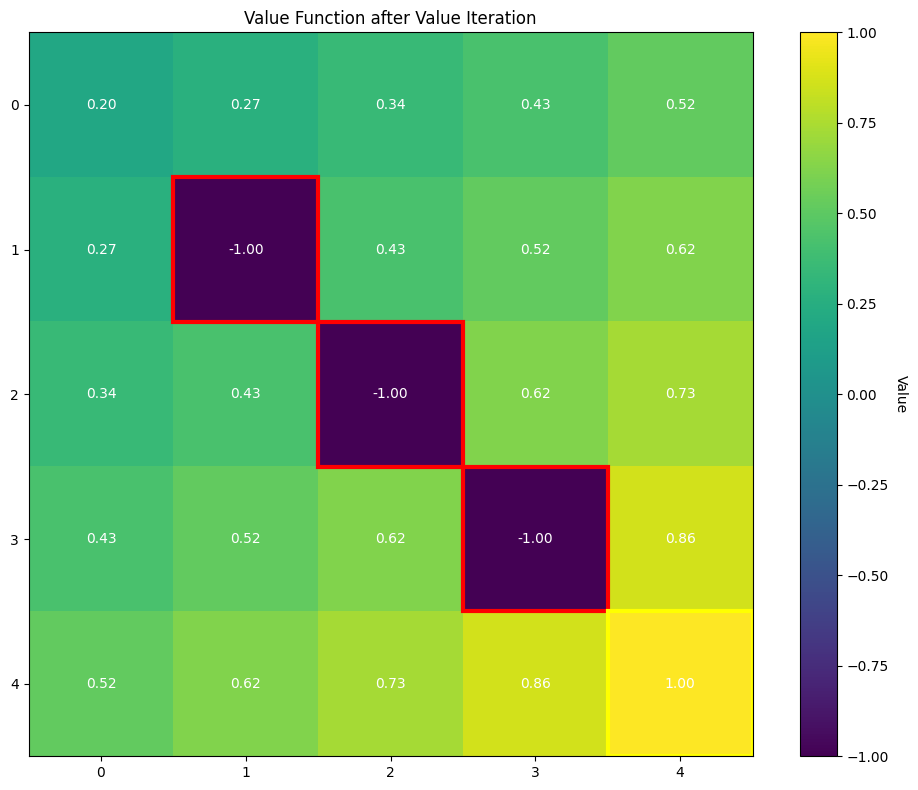

In [2]:
"""
Abstract:
This script demonstrates the application of the Bellman equation in dynamic programming
using a simple grid world example. It implements the value iteration algorithm to solve
the Bellman equation and visualizes the resulting value function. The grid world consists
of a 5x5 grid with a goal state, obstacle states, and associated rewards. This example
illustrates how the Bellman equation can be used to compute optimal values for each state
in a discrete environment, taking into account immediate rewards and discounted future values.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the grid world parameters
grid_size = 5  # Size of the square grid
goal_state = (grid_size-1, grid_size-1)  # Goal state at the bottom-right corner
obstacle_states = [(1, 1), (2, 2), (3, 3)]  # Positions of obstacles

# Define rewards for different types of states
goal_reward = 1  # Reward for reaching the goal
step_reward = -0.04  # Small negative reward for each step (to encourage shorter paths)
obstacle_reward = -1  # Penalty for hitting an obstacle

# Define discount factor (importance of future rewards)
gamma = 0.9

# Initialize value function with zeros
V = np.zeros((grid_size, grid_size))

# Define possible actions: right, down, left, up
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def is_valid_state(state):
    """
    Check if a given state is valid (within grid bounds and not an obstacle).

    Args:
    state (tuple): The state to check, represented as (row, column).

    Returns:
    bool: True if the state is valid, False otherwise.
    """
    return (0 <= state[0] < grid_size and
            0 <= state[1] < grid_size and
            state not in obstacle_states)

def get_reward(state):
    """
    Get the reward for a given state.

    Args:
    state (tuple): The state for which to get the reward.

    Returns:
    float: The reward value for the given state.
    """
    if state == goal_state:
        return goal_reward
    elif state in obstacle_states:
        return obstacle_reward
    else:
        return step_reward

def value_iteration(num_iterations):
    """
    Perform value iteration to solve the Bellman equation.

    Args:
    num_iterations (int): Number of iterations to perform.

    Returns:
    np.array: The final value function after iterations.
    """
    for _ in range(num_iterations):
        # Create a new array to store updated values
        new_V = np.zeros_like(V)

        # Iterate through all states in the grid
        for i in range(grid_size):
            for j in range(grid_size):
                if (i, j) == goal_state or (i, j) in obstacle_states:
                    # Goal and obstacle states have fixed rewards
                    new_V[i, j] = get_reward((i, j))
                else:
                    # For other states, calculate the max value based on possible actions
                    max_value = float('-inf')
                    for action in actions:
                        next_state = (i + action[0], j + action[1])
                        if is_valid_state(next_state):
                            # Calculate value using the Bellman equation
                            value = get_reward((i, j)) + gamma * V[next_state]
                            max_value = max(max_value, value)
                    new_V[i, j] = max_value

        # Update the value function
        V[:] = new_V

    return V

# Run value iteration
final_V = value_iteration(100)

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 8))

# Create a color map for the visualization
cmap = ListedColormap(['lightblue', 'yellow', 'red'])

# Plot the value function as a heatmap
im = ax.imshow(final_V, cmap='viridis')

# Add a colorbar to show the scale of values
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Value", rotation=-90, va="bottom")

# Add text annotations to show the value of each state
for i in range(grid_size):
    for j in range(grid_size):
        text = ax.text(j, i, f'{final_V[i, j]:.2f}',
                       ha='center', va='center', color='w')

        # Highlight the goal state
        if (i, j) == goal_state:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                       fill=False, edgecolor='yellow', lw=3))
        # Highlight obstacle states
        elif (i, j) in obstacle_states:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                       fill=False, edgecolor='red', lw=3))

# Set the title of the plot
ax.set_title("Value Function after Value Iteration")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

The graphic resulting from the Python script represents:

1. A 5x5 grid world:
   - Each square is a possible position (state) in the world.

2. Color coding:
   - Brighter colors (yellows) represent higher-value states.
   - Darker colors (blues) represent lower-value states.

3. Special states:
   - The brightest square (usually bottom-right) is the goal state.
   - Red-outlined squares are obstacles.

4. Numbers in each square:
   - These show the calculated value of each state.
   - Higher numbers indicate more desirable states.

5. Value gradient:
   - Values generally increase as you move closer to the goal.
   - Values decrease near obstacles.

This visualization shows how the Bellman equation has computed the long-term value of being in each state, considering both immediate rewards and potential future rewards. It effectively maps out the "landscape" of desirability across the grid world, which an agent could use to navigate optimally towards the goal while avoiding obstacles.

Here's an expanded explanation of the script:

1. Discrete Environment:
   The script uses a grid world, which is a discrete environment where states and actions are finite and clearly defined. This contrasts with continuous environments where states or actions can take on infinite values.

2. Computing Optimal Values:
   The Bellman equation is used to iteratively calculate the optimal value for each state. "Optimal" here means the best possible long-term reward that can be achieved starting from that state.

3. State Values:
   Each cell in the grid represents a state. The value of a state represents the expected cumulative reward an agent can obtain starting from that state and following the optimal policy thereafter.

4. Immediate Rewards:
   These are the direct rewards (or penalties) associated with being in a particular state or taking a specific action. In the script, there are immediate rewards for reaching the goal, penalties for obstacles, and small negative rewards for each step.

5. Discounted Future Values:
   The Bellman equation doesn't just consider immediate rewards, but also potential future rewards. These future rewards are "discounted" (multiplied by a factor < 1) to reflect that immediate rewards are generally more valuable than distant future rewards.

6. Iterative Computation:
   The script uses value iteration, repeatedly applying the Bellman equation to update state values until they converge to the optimal values.

7. Decision Making:
   While not explicitly shown in the visualization, these computed values can be used to derive an optimal policy - a strategy for choosing the best action in each state.

This approach demonstrates how complex decision-making problems can be solved by breaking them down into simpler subproblems and iteratively computing optimal solutions, which is the essence of dynamic programming.